In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1) Завантажити дані, вивести назви колонок і розмір датасета

In [2]:
df = pd.read_csv("cybersecurity_attacks.csv")  # https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks/

df.sample(5).T

,12264,28238,24076,18942,37560
Timestamp,2023-09-14 09:06:32,2021-06-16 03:29:20,2023-05-31 16:21:25,2021-11-26 16:42:27,2022-08-23 18:52:11
Source IP Address,56.9.169.29,155.45.104.91,220.236.50.0,214.4.7.5,124.36.126.211
Destination IP Address,60.236.190.97,56.208.115.7,212.17.178.24,198.81.191.48,131.194.19.104
Source Port,10781,4553,25652,25487,46681
Destination Port,24501,46213,54330,14728,10132
Protocol,UDP,ICMP,UDP,UDP,TCP
Packet Length,1437,1152,549,1144,1058
Packet Type,Data,Control,Control,Data,Data
Traffic Type,HTTP,DNS,FTP,DNS,FTP
Payload Data,Dignissimos inventore id aperiam. In laudantiu...,Exercitationem quidem itaque ipsum. Voluptatem...,Repellendus totam illo odit non quaerat volupt...,Dolorum beatae corrupti ullam. Exercitationem ...,Quam autem voluptates ab.\nEt architecto in ne...


In [3]:
print(f"List of column names:", df.columns, "\n")

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset")

List of column names: Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object') 

There are 40000 rows and 25 columns in the dataset


## 2) Опрацювати пропуски (по можливості заповнити їх або видалити)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [5]:
df.isnull().sum() / len(df) * 100

Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.0000
Protocol                   0.0000
Packet Length              0.0000
Packet Type                0.0000
Traffic Type               0.0000
Payload Data               0.0000
Malware Indicators        50.0000
Anomaly Scores             0.0000
Alerts/Warnings           50.1675
Attack Type                0.0000
Attack Signature           0.0000
Action Taken               0.0000
Severity Level             0.0000
User Information           0.0000
Device Information         0.0000
Network Segment            0.0000
Geo-location Data          0.0000
Proxy Information         49.6275
Firewall Logs             49.9025
IDS/IPS Alerts            50.1250
Log Source                 0.0000
dtype: float64

In [6]:
df['Malware Indicators'] = df['Malware Indicators'].apply(lambda x: 'Nothing Detected' if pd.isna(x) else x)
df['Alerts/Warnings'] = df['Alerts/Warnings'].apply(lambda x: 'Yes' if x == 'Alert Triggered' else 'No')
df['Proxy Information'] = df['Proxy Information'].apply(lambda x: 'Without Proxy' if pd.isna(x) else x)
df['Firewall Logs'] = df['Firewall Logs'].apply(lambda x: 'Not Logged' if pd.isna(x) else x)
df['IDS/IPS Alerts'] = df['IDS/IPS Alerts'].apply(lambda x: 'Not Alerted' if pd.isna(x) else x)

In [7]:
for column in df.columns:
    unique_values = set(df[column])
    if len(unique_values) <= 10:
        print(f"Unique values in column '{column}' ({len(unique_values)}): {unique_values}")
    else:
        print(f"Column '{column}' has more than 10 unique values: {len(unique_values)}")

Column 'Timestamp' has more than 10 unique values: 39997
Column 'Source IP Address' has more than 10 unique values: 40000
Column 'Destination IP Address' has more than 10 unique values: 40000
Column 'Source Port' has more than 10 unique values: 29761
Column 'Destination Port' has more than 10 unique values: 29895
Unique values in column 'Protocol' (3): {'ICMP', 'TCP', 'UDP'}
Column 'Packet Length' has more than 10 unique values: 1437
Unique values in column 'Packet Type' (2): {'Data', 'Control'}
Unique values in column 'Traffic Type' (3): {'HTTP', 'DNS', 'FTP'}
Column 'Payload Data' has more than 10 unique values: 40000
Unique values in column 'Malware Indicators' (2): {'IoC Detected', 'Nothing Detected'}
Column 'Anomaly Scores' has more than 10 unique values: 9826
Unique values in column 'Alerts/Warnings' (2): {'No', 'Yes'}
Unique values in column 'Attack Type' (3): {'Malware', 'Intrusion', 'DDoS'}
Unique values in column 'Attack Signature' (2): {'Known Pattern A', 'Known Pattern B'}


In [8]:
null_counts = df.isnull().sum().sort_values(ascending=False)

if null_counts.sum() == 0:
    print("There are no missing values in the dataset.")
else:
    print("There are missing values in the dataset.")

There are no missing values in the dataset.


## 3) Візуаліузвати дані

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
related_features = ['IDS/IPS Alerts', 'Protocol', 'Traffic Type', 'Malware Indicators', 
                    'Anomaly Scores', 'Severity Level', 'Action Taken', 'Attack Type']

categorical_columns = ['Protocol', 'Traffic Type', 'Malware Indicators', 
                       'Severity Level', 'Action Taken', 'Attack Type']

df_encoded = pd.get_dummies(df[related_features], columns=categorical_columns)

df_encoded['IDS/IPS Alerts'] = df_encoded['IDS/IPS Alerts'].apply(lambda x: 1 if x == 'Alert Data' else 0)

In [12]:
df_encoded.sample(10).T

,13835,27603,30912,951,9538,10939,10655,33068,2494,31887
IDS/IPS Alerts,1,1,0,0,0,1,1,0,1,1
Anomaly Scores,51.58,86.3,19.12,7.26,12.36,75.27,45.02,95.71,44.74,63.46
Protocol_ICMP,True,True,False,True,False,True,True,False,False,False
Protocol_TCP,False,False,False,False,True,False,False,True,False,False
Protocol_UDP,False,False,True,False,False,False,False,False,True,True
Traffic Type_DNS,False,False,False,False,False,False,False,False,True,False
Traffic Type_FTP,False,False,False,True,False,True,True,True,False,True
Traffic Type_HTTP,True,True,True,False,True,False,False,False,False,False
Malware Indicators_IoC Detected,True,False,False,False,True,False,False,True,True,False
Malware Indicators_Nothing Detected,False,True,True,True,False,True,True,False,False,True


- Побудувати графік (heatmap), що відображає кореляці 
ознак між собою і з цільовою змінною (розміткою)

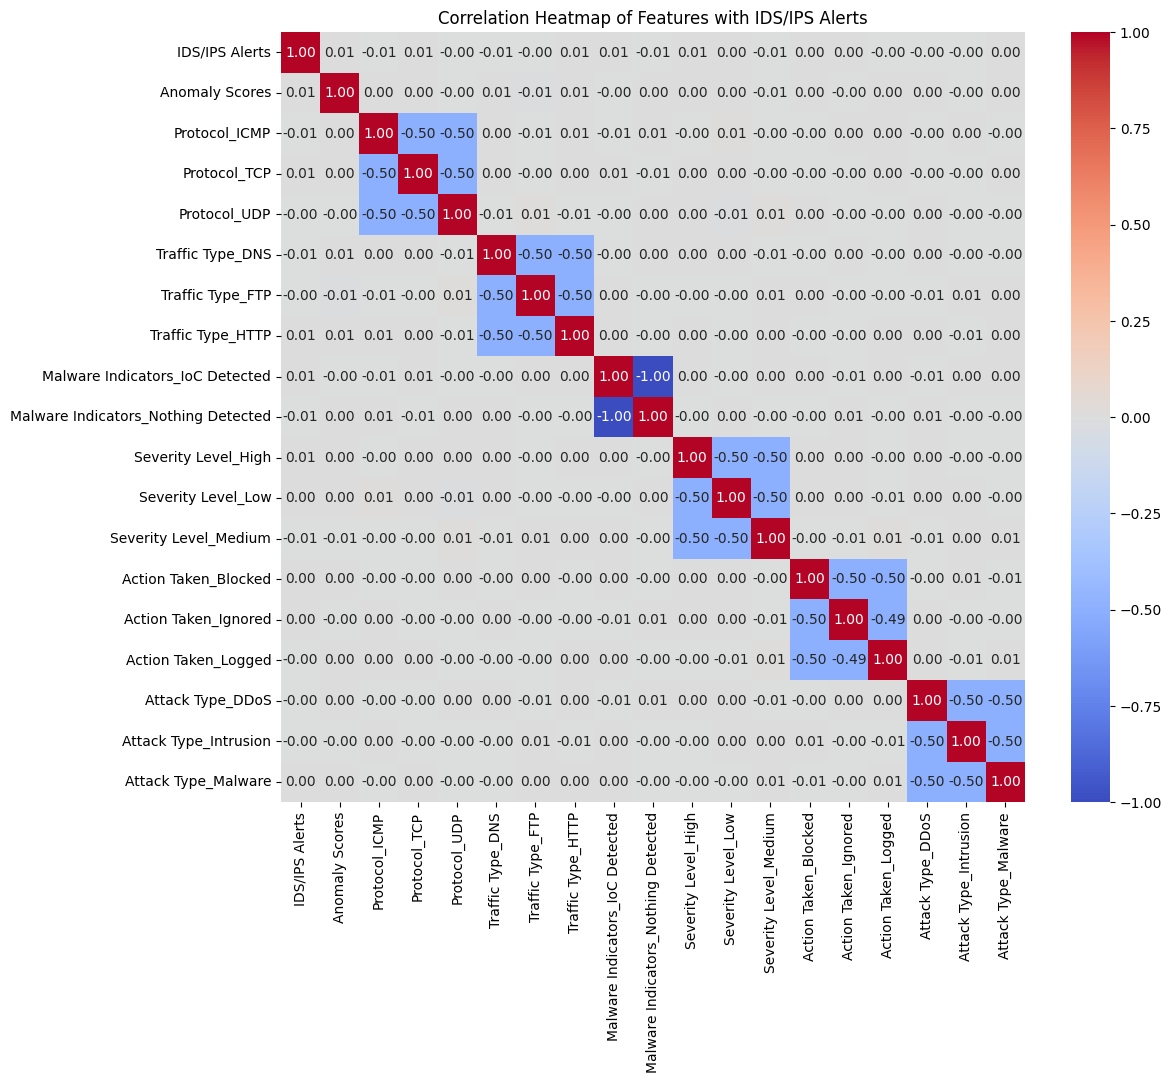

In [13]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap of Features with IDS/IPS Alerts')
plt.show()

- Побудувати гістограми розподілу ознак

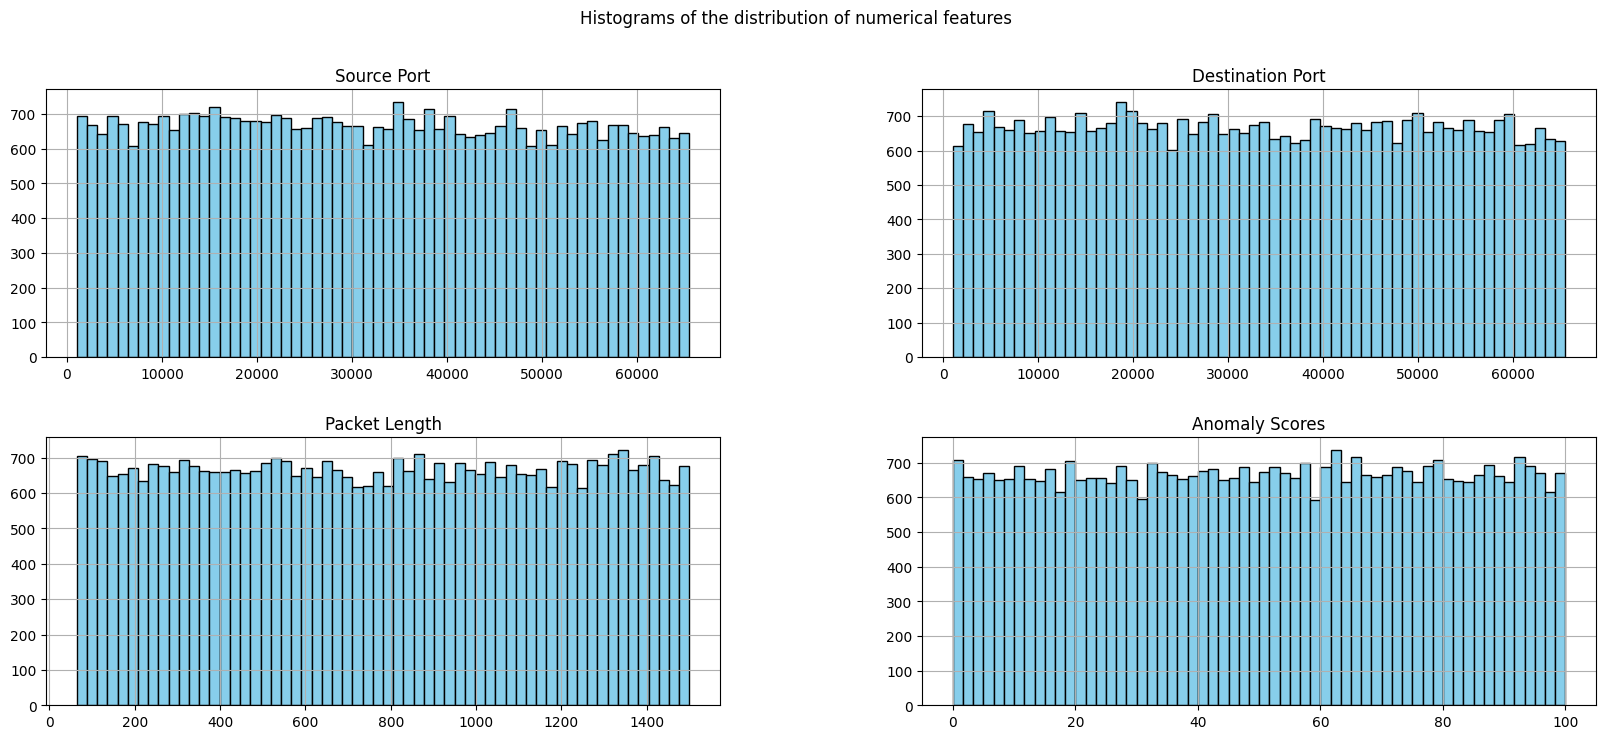

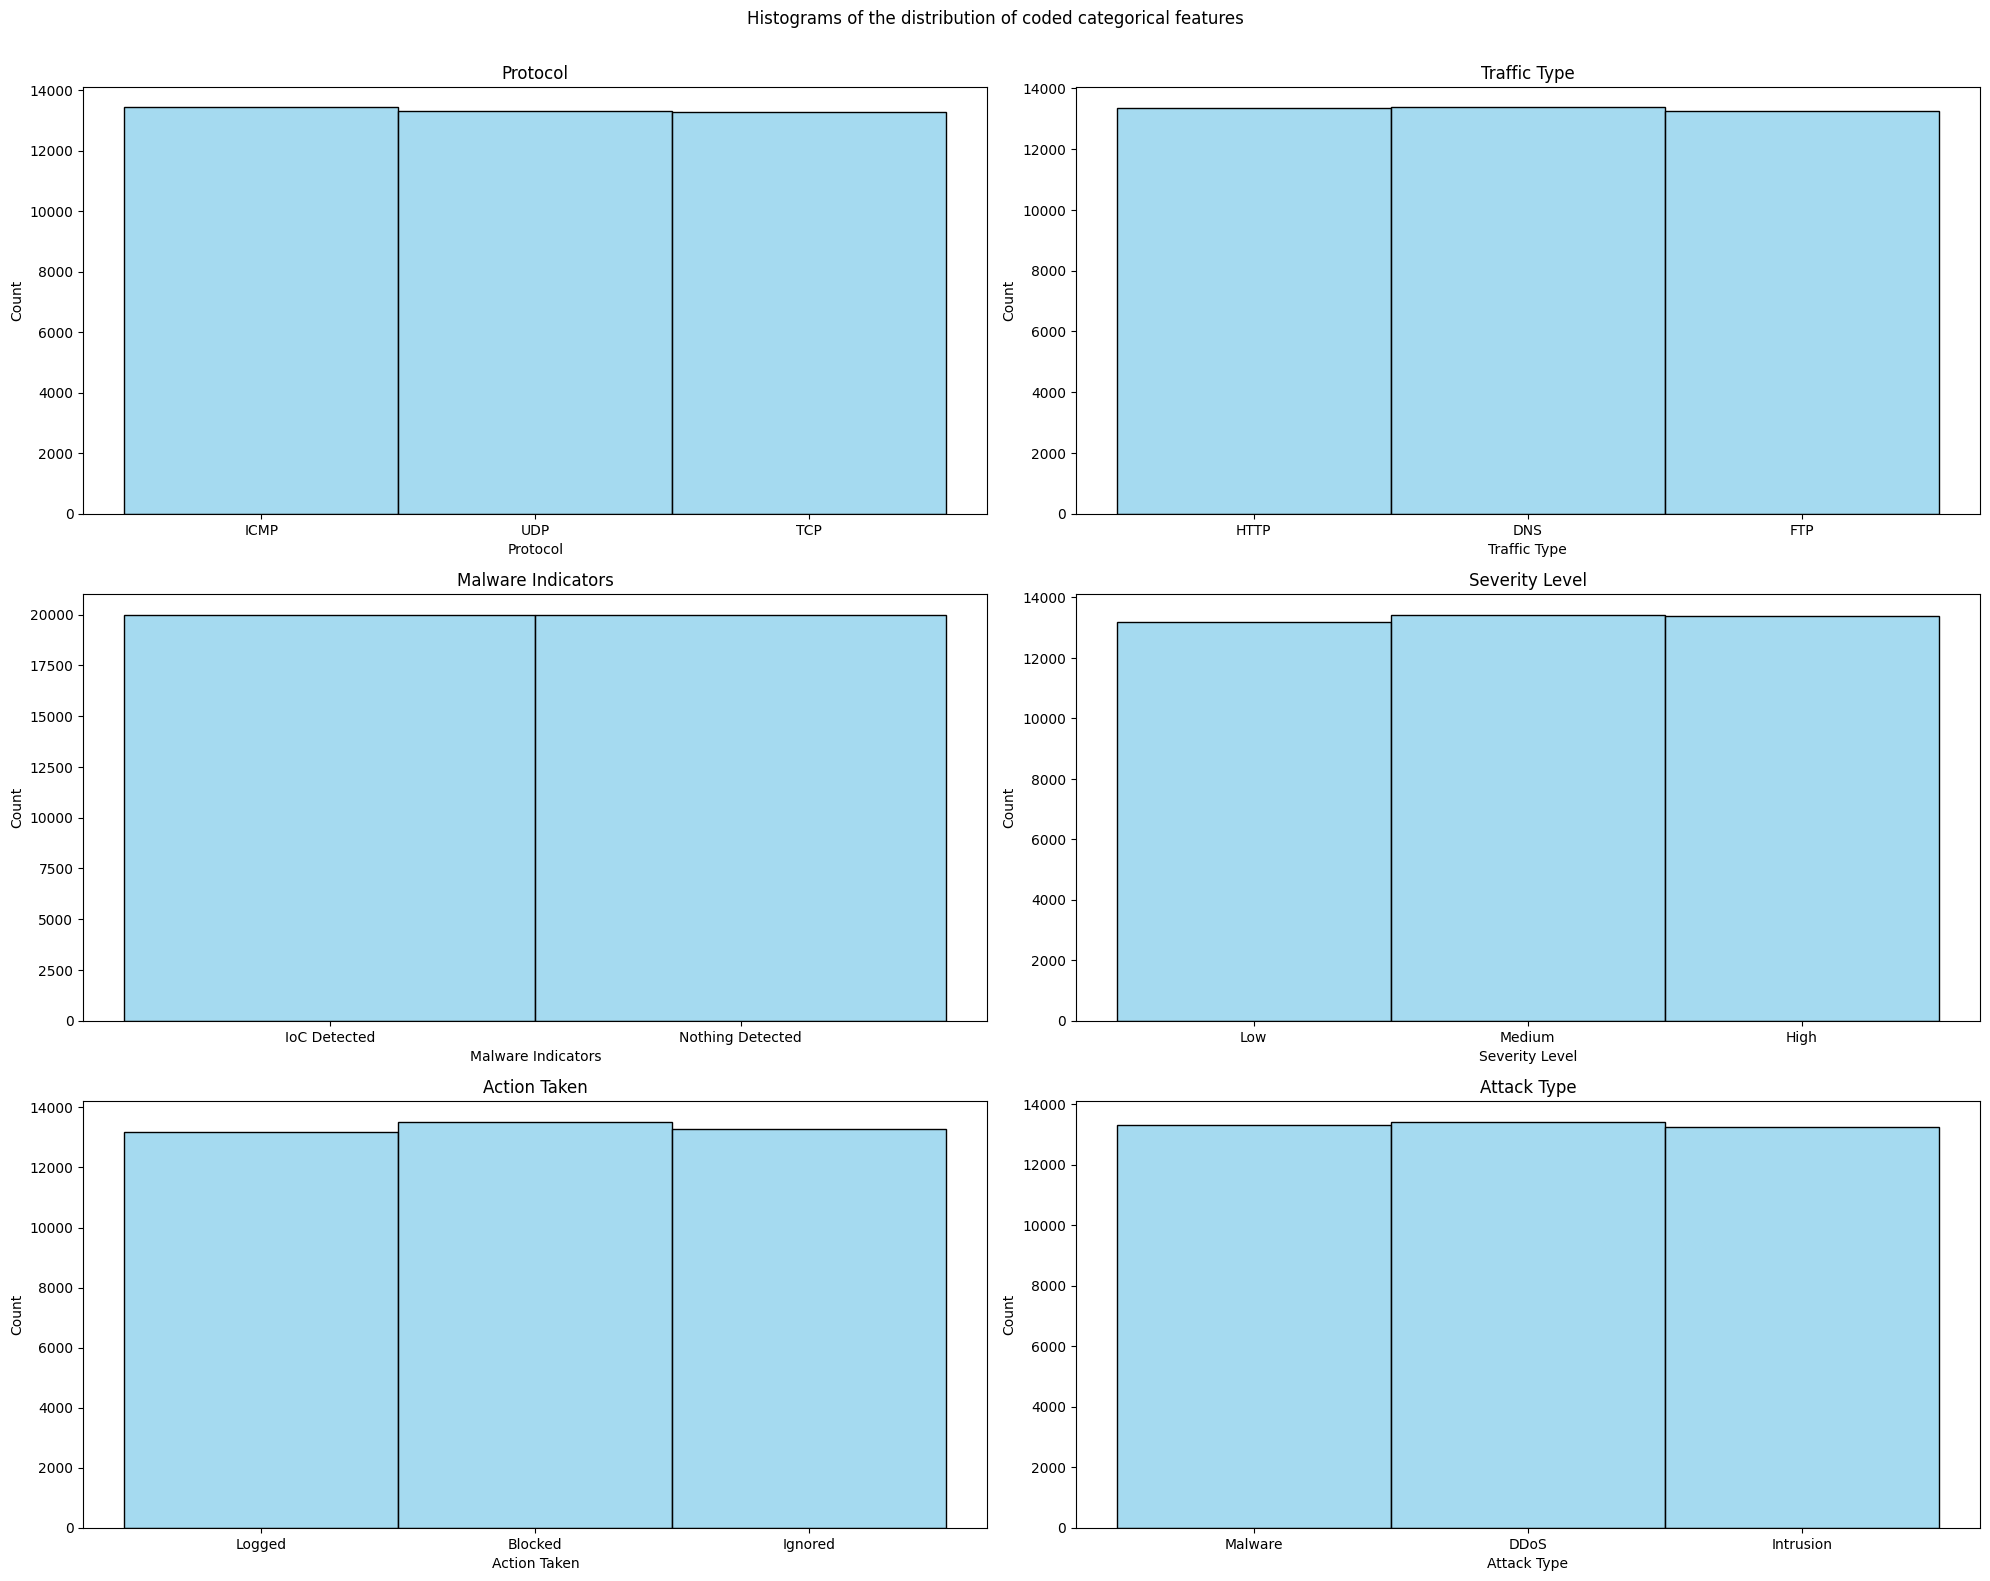

In [14]:
df.hist(bins=60, figsize=(20, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of the distribution of numerical features')
plt.show()

plt.figure(figsize=(20, 20))
for i, column in enumerate(df[categorical_columns].columns, 1):
    plt.subplot(4, 2, i)  # налаштовуємо розміщення кількох графіків на одній сторінці
    sns.histplot(df[column], kde=False, color='skyblue', edgecolor='black')
    plt.title(column)
    plt.tight_layout()
plt.suptitle('Histograms of the distribution of coded categorical features', y=1.02)
plt.show()

- Побудувати boxplot-и ознак відносно цільової змінної (якщо ознак занадто багато обмежитися декількома)

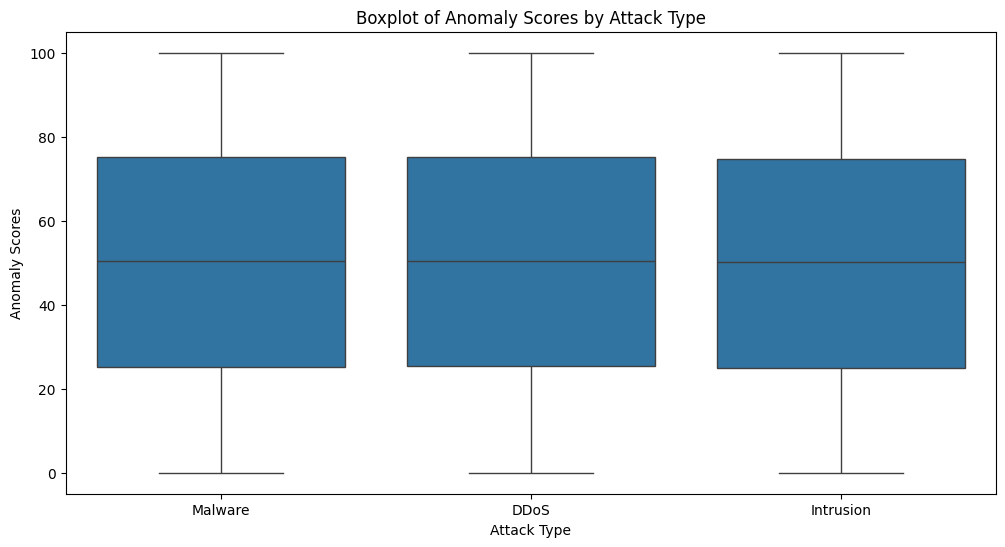

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Attack Type', y='Anomaly Scores', data=df)

plt.title('Boxplot of Anomaly Scores by Attack Type')
plt.show()

## 4) Нормалізувати дані

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Anomaly Scores', 'Packet Length']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.sample(5).T

,16256,22555,37326,13495,34575
Timestamp,2022-11-18 08:27:05,2021-01-07 10:09:28,2022-12-12 00:19:45,2021-09-11 22:18:24,2021-07-02 06:43:26
Source IP Address,16.26.249.106,50.237.199.78,194.167.41.2,74.20.99.138,3.247.79.239
Destination IP Address,104.249.157.201,24.35.103.14,210.175.241.122,204.130.200.180,209.212.7.71
Source Port,49871,40349,21843,64357,54334
Destination Port,21279,56552,55162,65350,56574
Protocol,TCP,UDP,UDP,UDP,ICMP
Packet Length,0.844986,1.505982,0.582992,0.044581,-0.082811
Packet Type,Data,Data,Data,Control,Control
Traffic Type,FTP,FTP,FTP,FTP,HTTP
Payload Data,Ea blanditiis odio excepturi. Quam numquam deb...,Magnam inventore temporibus consectetur natus ...,Ipsam labore id ad iure in. Eos itaque distinc...,Error repellendus voluptatum. Repellat repelle...,Quam dolore tempore vitae reprehenderit facere...


## 5) Провести навчання класифікаторів

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
X = df_encoded[['Severity Level_Low', 'Severity Level_Medium', 'Severity Level_High']]
y = df_encoded['IDS/IPS Alerts']

# Розділяємо дані на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- kNN

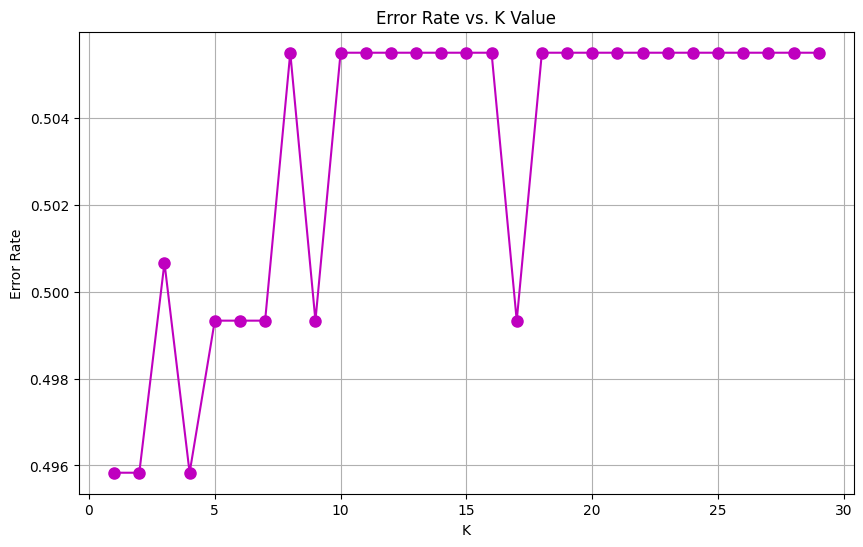

In [19]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=8, color='m')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

In [20]:
knn = KNeighborsClassifier(n_neighbors=4)
params_knn = {'n_neighbors': range(1, 15)}
grid_knn = GridSearchCV(knn, param_grid=params_knn, cv=5)
grid_knn.fit(X_train, y_train)
y_pred_knn = grid_knn.predict(X_test)

print("kNN Classification Report")
print(classification_report(y_test, y_pred_knn))
print("kNN Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))

kNN Classification Report
              precision    recall  f1-score   support

           0       0.50      0.66      0.57      6050
           1       0.49      0.33      0.39      5950

    accuracy                           0.49     12000
   macro avg       0.49      0.49      0.48     12000
weighted avg       0.49      0.49      0.48     12000

kNN Confusion Matrix
[[3969 2081]
 [3985 1965]]


- Decision Tree

In [21]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Classification Report")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.50      0.66      0.57      6050
           1       0.49      0.33      0.40      5950

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.48     12000
weighted avg       0.50      0.50      0.49     12000

Decision Tree Confusion Matrix
[[4011 2039]
 [3969 1981]]


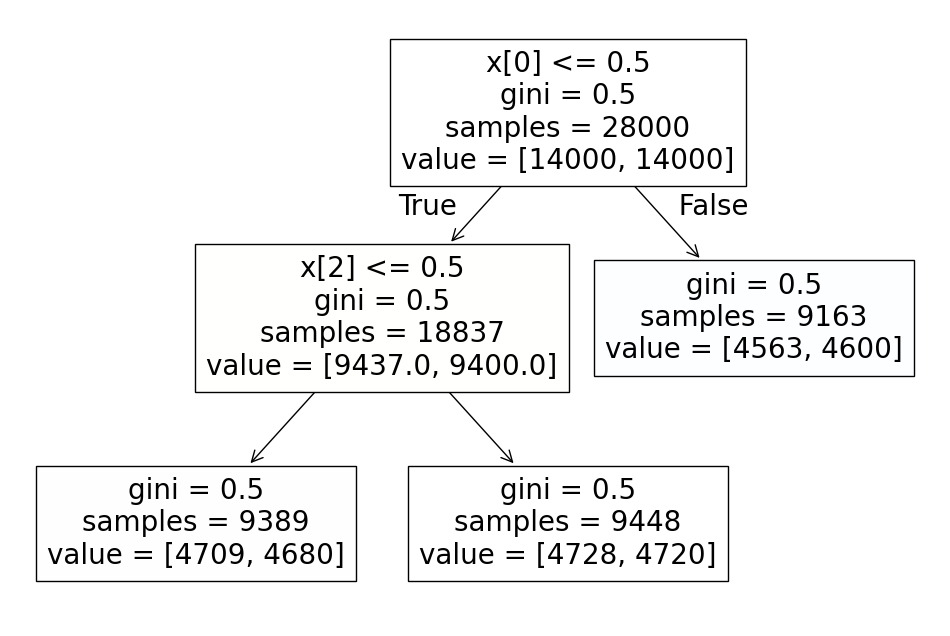

In [22]:
plt.figure(figsize = (12, 8))
plot_tree(dt, filled = True)
plt.show()

- SVM

In [23]:
svm = SVC()
params_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_svm = GridSearchCV(svm, param_grid=params_svm, cv=5)
grid_svm.fit(X_train, y_train)
y_pred_svm = grid_svm.predict(X_test)

print("SVM Classification Report")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classification Report
              precision    recall  f1-score   support

           0       0.50      0.66      0.57      6050
           1       0.49      0.33      0.40      5950

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.48     12000
weighted avg       0.50      0.50      0.49     12000

SVM Confusion Matrix
[[4011 2039]
 [3969 1981]]


- Random Forest

In [24]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.50      0.66      0.57      6050
           1       0.49      0.33      0.40      5950

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.48     12000
weighted avg       0.50      0.50      0.49     12000

Random Forest Confusion Matrix
[[4011 2039]
 [3969 1981]]


- AdaBoost

In [25]:
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("AdaBoost Classification Report")
print(classification_report(y_test, y_pred_ada))
print("AdaBoost Confusion Matrix")
print(confusion_matrix(y_test, y_pred_ada))

AdaBoost Classification Report
              precision    recall  f1-score   support

           0       0.50      0.66      0.57      6050
           1       0.49      0.33      0.40      5950

    accuracy                           0.50     12000
   macro avg       0.50      0.50      0.48     12000
weighted avg       0.50      0.50      0.49     12000

AdaBoost Confusion Matrix
[[4011 2039]
 [3969 1981]]
